In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import optuna
import joblib

In [ ]:
pip install joblib

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mssmartypants/rice-type-classification")

print("Path to dataset files:", path)

100%|██████████| 888k/888k [00:00<00:00, 65.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mssmartypants/rice-type-classification/versions/2


### Problem Statement
classify rice into different types based on its physical characteristics.
### Objective
Develop a machine learning model to classify rice based on its characters.

In [ ]:
data = pd.read_csv("/root/.cache/kagglehub/datasets/mssmartypants/rice-type-classification/versions/2/riceClassification.csv")

In [ ]:
data

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [ ]:
datac = data.copy()

In [ ]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [ ]:
# Data Preprocessing
data.drop(columns=['id'], inplace=True)  # Remove ID column if not needed
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# class distribution

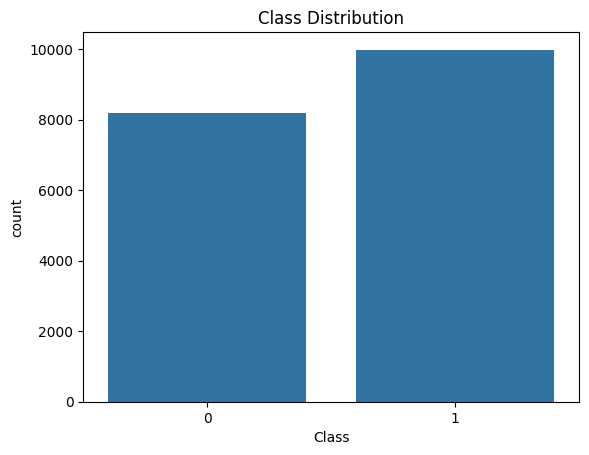

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=datac)
plt.title('Class Distribution')
plt.show()

In [ ]:
# pairplot for feature relationship

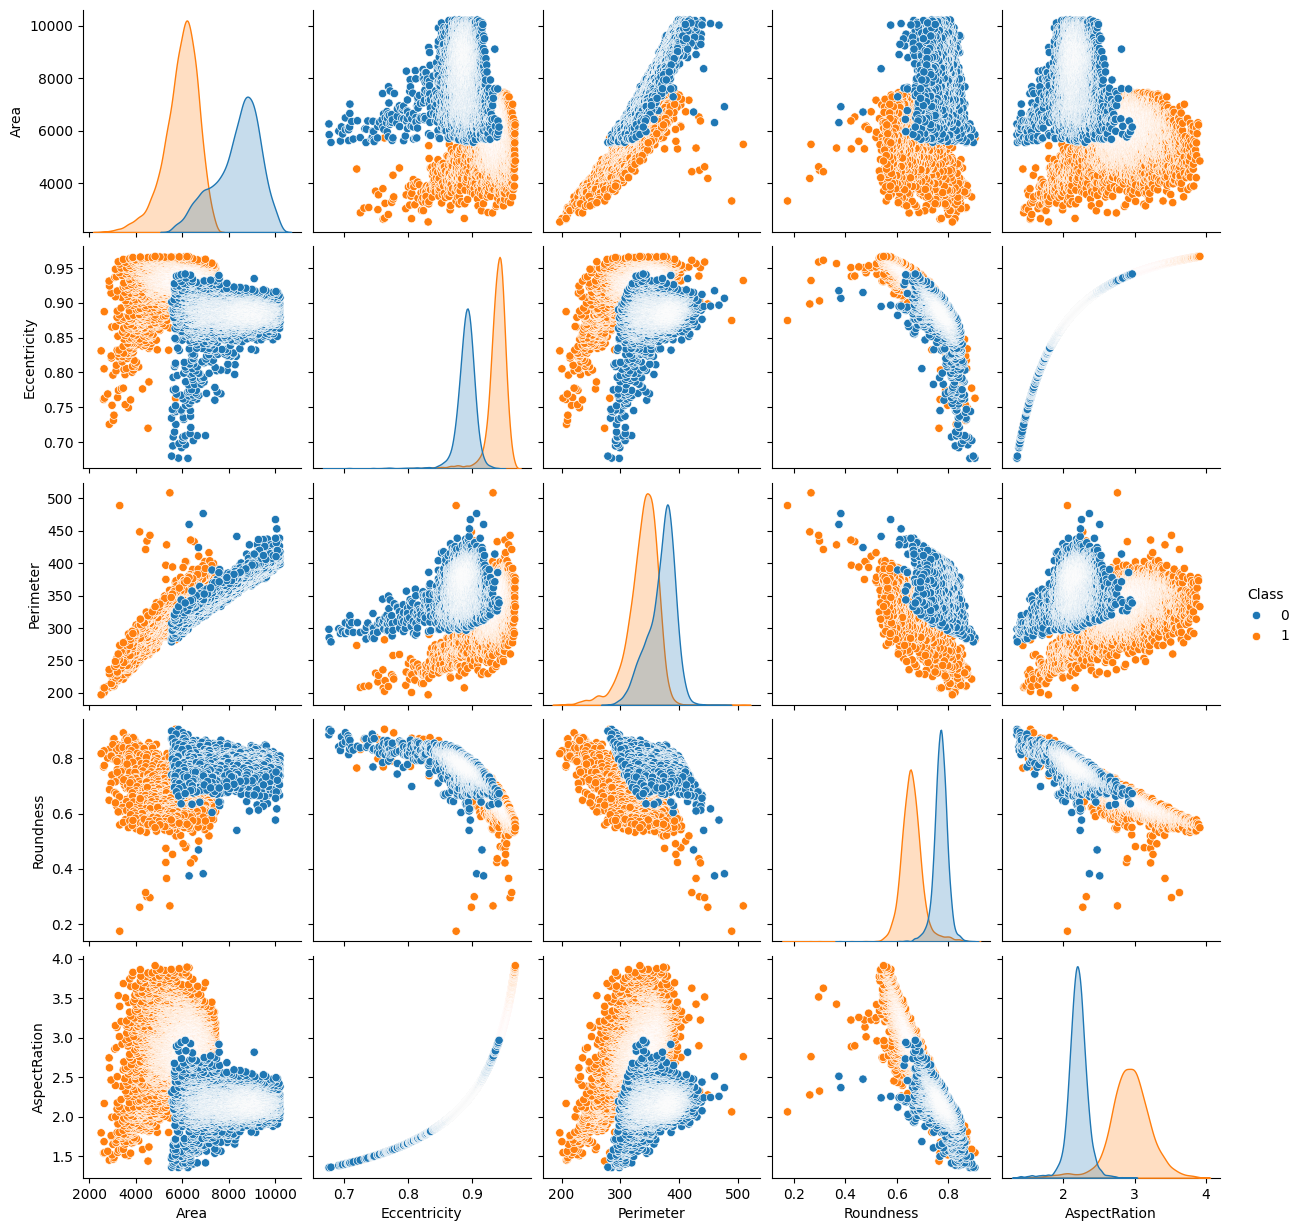

In [ ]:
import seaborn as sns

sns.pairplot(datac[['Area', 'Eccentricity', 'Perimeter', 'Roundness', 'AspectRation', 'Class']], hue='Class')
plt.show()

In [ ]:
# Correlation heatmap

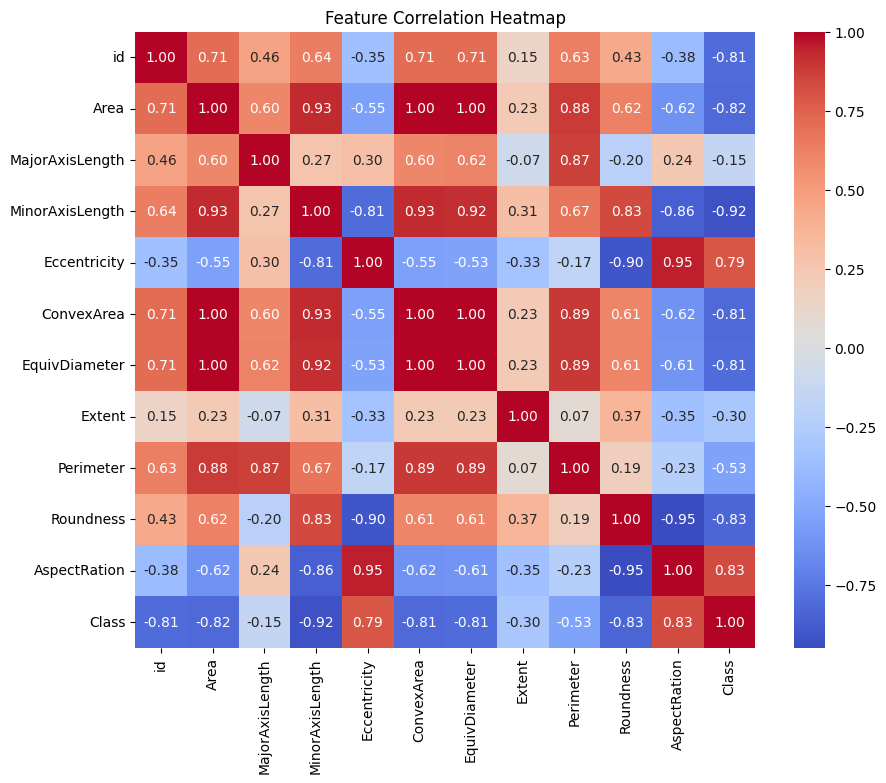

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(datac.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Boxplot of key features vs class

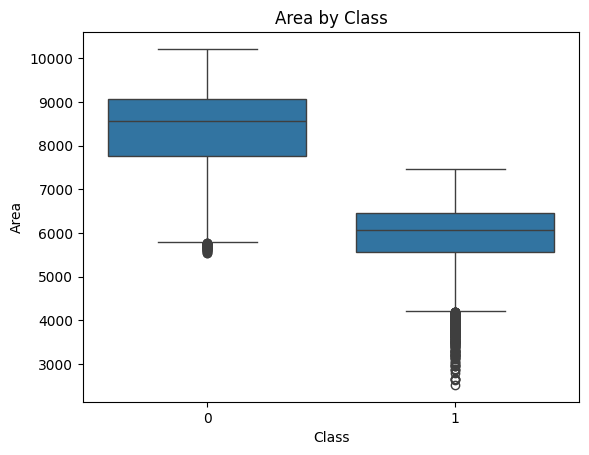

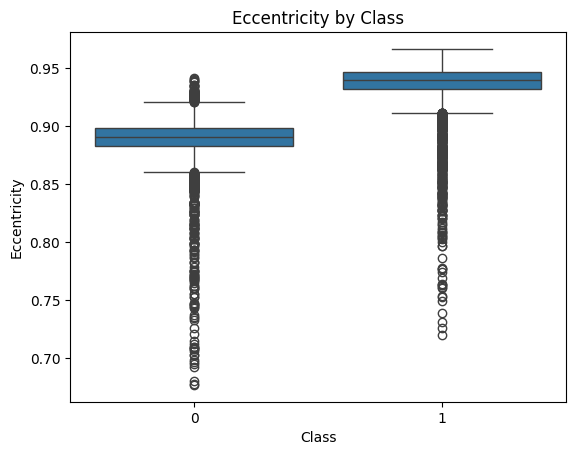

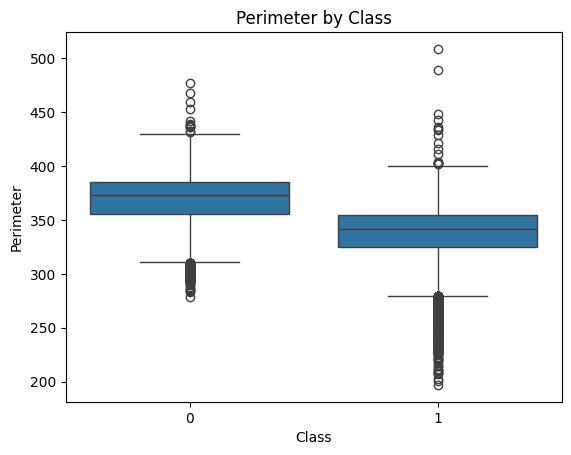

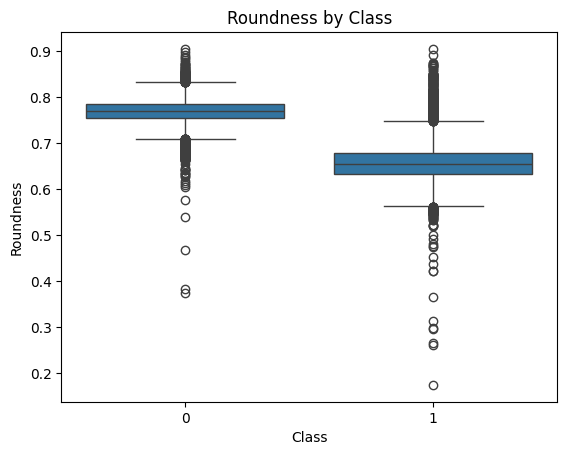

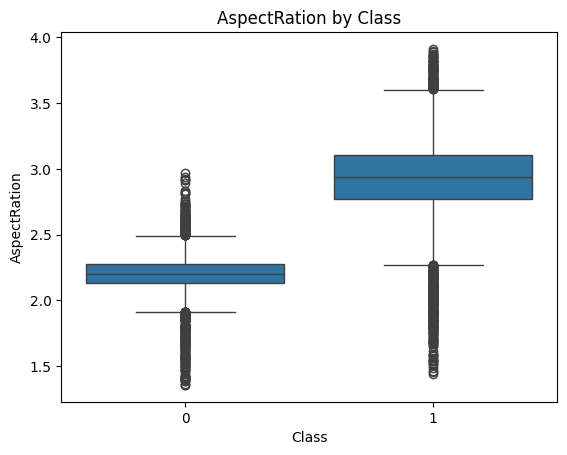

In [ ]:
features = ['Area', 'Eccentricity', 'Perimeter', 'Roundness', 'AspectRation']
for feature in features:
    sns.boxplot(x='Class', y=feature, data=datac)
    plt.title(f'{feature} by Class')
    plt.show()

In [ ]:
# distribution plots(Histogram)

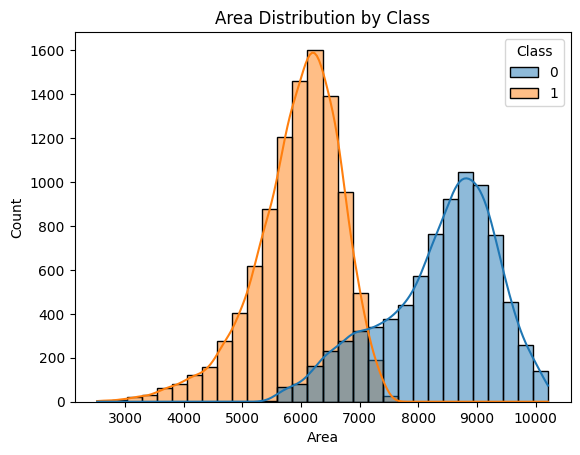

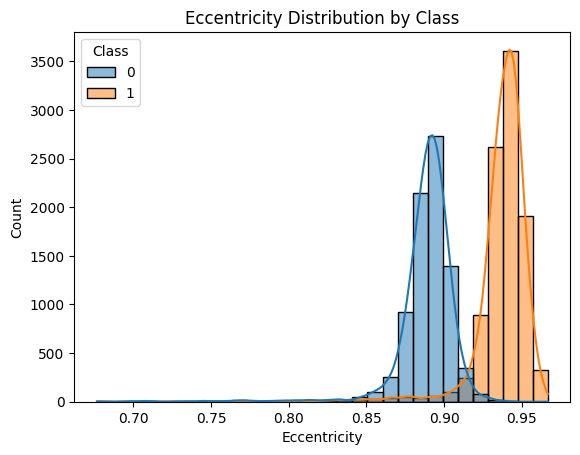

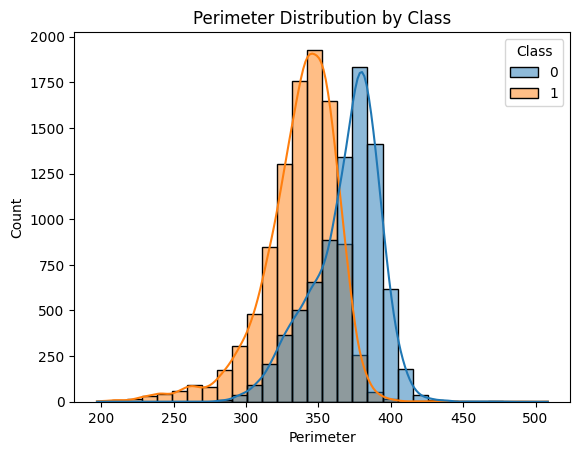

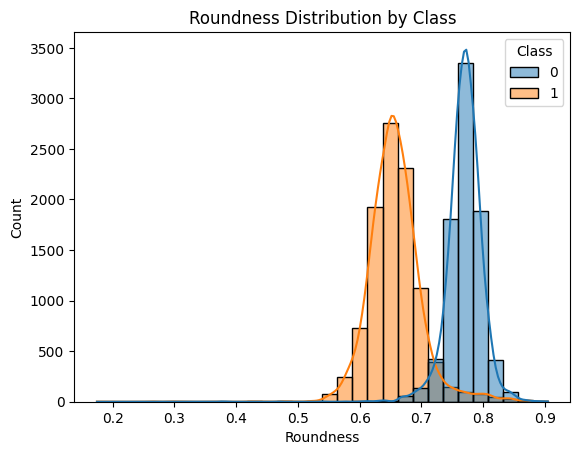

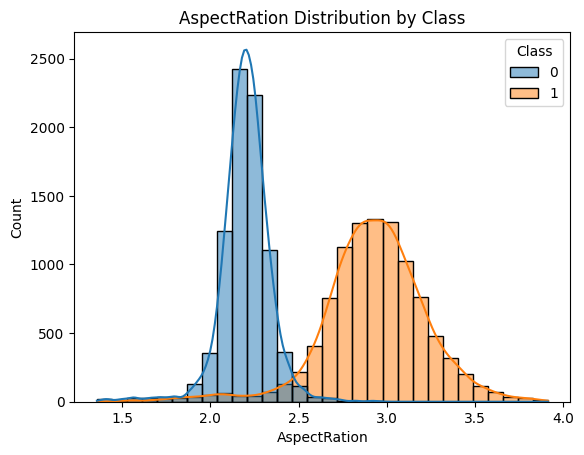

In [ ]:
features = ['Area', 'Eccentricity', 'Perimeter', 'Roundness', 'AspectRation']
for feature in features:
    sns.histplot(data=datac, x=feature, hue='Class', kde=True, bins=30)
    plt.title(f'{feature} Distribution by Class')
    plt.show()

In [ ]:
# Hyperparameter Tuning with Optuna
def objective(trial):
    model_name = trial.suggest_categorical("model", ["RandomForest", "KNN", "DecisionTree", "SVM"])

    if model_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 2, 20)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif model_name == "KNN":
        n_neighbors = trial.suggest_int("n_neighbors", 3, 15)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
    elif model_name == "DecisionTree":
        max_depth = trial.suggest_int("max_depth", 2, 20)
        model = DecisionTreeClassifier(max_depth=max_depth)
    elif model_name == "SVM":
        C = trial.suggest_loguniform("C", 0.1, 10)
        model = SVC(C=C)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    return scores.mean()

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2025-03-18 12:50:09,338] A new study created in memory with name: no-name-8b19b99b-1cf7-405e-b0fd-322fe1a1df4f
[I 2025-03-18 12:50:23,087] Trial 0 finished with value: 0.9894827404937161 and parameters: {'model': 'RandomForest', 'n_estimators': 96, 'max_depth': 8}. Best is trial 0 with value: 0.9894827404937161.
<ipython-input-13-2a59e8de8fa5>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.1, 10)
[I 2025-03-18 12:50:24,788] Trial 1 finished with value: 0.9903077426496039 and parameters: {'model': 'SVM', 'C': 0.4273170129766791}. Best is trial 1 with value: 0.9903077426496039.
[I 2025-03-18 12:50:25,524] Trial 2 finished with value: 0.984602377501273 and parameters: {'model': 'DecisionTree', 'max_depth': 18}. Best is trial 1 with value: 0.9903077426496039.
[I 2025-03-18 12:50:40,496] Tri

In [ ]:
# Best Model
best_params = study.best_params
if best_params["model"] == "RandomForest":
    final_model = RandomForestClassifier(n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"])
elif best_params["model"] == "KNN":
    final_model = KNeighborsClassifier(n_neighbors=best_params["n_neighbors"])
elif best_params["model"] == "DecisionTree":
    final_model = DecisionTreeClassifier(max_depth=best_params["max_depth"])
elif best_params["model"] == "SVM":
    final_model = SVC(C=best_params["C"])

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', final_model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

Accuracy: 0.9895518284300248
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1632
           1       0.99      0.99      0.99      2005

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



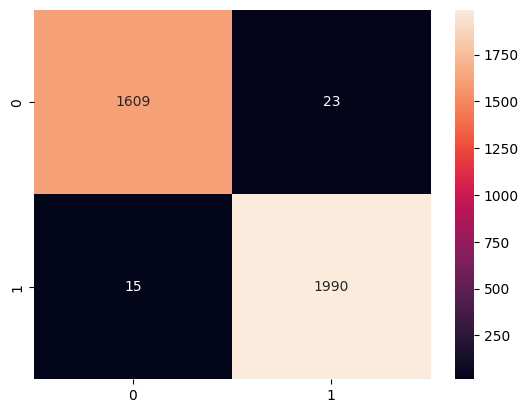

In [ ]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [ ]:
# Save Model
joblib.dump(pipeline, "rice_model.pkl")

['rice_model.pkl']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import optuna
import joblib

# Load Data
data = pd.read_csv("rice_data.csv")  # Replace with actual file path

# Problem Statement
print("### Problem Statement")
print("Predicting the type of rice based on grain properties using machine learning.")

# Data Preprocessing
data.drop(columns=['id'], inplace=True)  # Remove ID column if not needed
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning with Optuna
def objective(trial):
    model_name = trial.suggest_categorical("model", ["RandomForest", "KNN", "DecisionTree", "SVM"])

    if model_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 2, 20)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif model_name == "KNN":
        n_neighbors = trial.suggest_int("n_neighbors", 3, 15)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
    elif model_name == "DecisionTree":
        max_depth = trial.suggest_int("max_depth", 2, 20)
        model = DecisionTreeClassifier(max_depth=max_depth)
    elif model_name == "SVM":
        C = trial.suggest_loguniform("C", 0.1, 10)
        model = SVC(C=C)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Best Model
best_params = study.best_params
if best_params["model"] == "RandomForest":
    final_model = RandomForestClassifier(n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"])
elif best_params["model"] == "KNN":
    final_model = KNeighborsClassifier(n_neighbors=best_params["n_neighbors"])
elif best_params["model"] == "DecisionTree":
    final_model = DecisionTreeClassifier(max_depth=best_params["max_depth"])
elif best_params["model"] == "SVM":
    final_model = SVC(C=best_params["C"])

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', final_model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

# Save Model
joblib.dump(pipeline, "rice_model.pkl")
